# ***Sentiment Analysis of Tweets on Apple and Google Products***



## *Introduction*

This project aims to perform sentiment analysis on tweets related to Apple and Google products using a labeled dataset. By classifying tweets as positive, negative, or neutral, we seek to understand public perception of these tech giants and uncover trends in user opinion. The dataset offers a realistic glimpse into consumer sentiment, making it ideal for training and evaluating NLP classification models.

### *Problem Statement*

With millions of users sharing their opinions on social media, understanding customer sentiment toward major tech brands is vital. This project seeks to automatically classify tweets mentioning Apple and Google products into positive, negative, or neutral sentiments. By leveraging natural language processing, we aim to build a model that can extract meaningful insights from public opinion, helping stakeholders understand brand perception and inform strategic decisions.

### Dataset Overview: "tweet_product_company.csv"

This dataset captures real-world tweet data mentioning Apple and Google products, offering a rich source of public sentiment expressed through social media. Each entry typically includes the tweet's text, the referenced product, the associated company (Apple or Google), and a sentiment label—categorized as **positive**, **negative**, or **neutral**.

### Data Source

The dataset was curated from Twitter via public scraping or aggregated repositories, specifically targeting mentions of Apple and Google. While exact sourcing details may vary, the collection aligns with ethical standards for public tweet analysis and is commonly used in NLP and sentiment modeling projects. It reflects organic user opinions and consumer reactions across various product releases, updates, and experiences.

### Why This Dataset?

This data is perfectly suited for sentiment analysis because:
- Tweets are short, noisy, and opinion-driven—ideal for testing robust NLP techniques.
- It supports both **binary** classification (positive vs negative) and **multiclass** sentiment prediction.
- Comparative sentiment between Apple and Google enables business insights and brand analysis.
- It offers real-world variability—emoji usage, slang, abbreviations—which makes preprocessing more meaningful.

Through this dataset, we aim to:
- Understand how users perceive Apple vs. Google across time.
- Build a scalable model that can automatically detect sentiment in real time.
- Extract actionable insights that can guide marketing, product improvements, and customer engagement.


## 1. ***DATA PREPARATION***

We will 
- import all neccessary libraries
- load the 'twee_product_company.csv' dataset
- exploratory inspection

#### **a) importing necessary libraries** 

In [41]:
# Core Libraries
import pandas as pd
import numpy as np

# Text Preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### **b) Loading the dataset**

In [23]:
df = pd.read_csv('../data/tweet_product_company.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### **C) Exploratory inspection of the dataset**

In [ ]:
df.info

<bound method DataFrame.info of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                

DataFrame Summary

This dataset contains **9,093 tweet entries** spread across **three columns**:

1. `tweet_text`: The full text of each tweet, which serves as our input for sentiment classification.
2. `emotion_in_tweet_is_directed_at`: Indicates which brand or product the emotion is directed at (e.g., iPhone, iPad, Google). Some entries may be missing (`NaN`), suggesting tweets without clear product targeting.
3. `is_there_an_emotion_directed_at_a_brand_or_product`: Contains sentiment labels like "Positive emotion," "Negative emotion," or "No emotion toward brand or product."

In [11]:
df.describe(include='object')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


Data Summary

The `.describe()` method provides a high-level overview of the dataset’s non-numeric columns:

- **`tweet_text`**  
  - **Count**: 9,092 entries  
  - **Unique**: 9,065 distinct tweets  
  - **Most Frequent Tweet**: `"RT @mention Marissa Mayer: Google Will Connect..."`  
  - **Frequency**: 5 occurrences  

- **`emotion_in_tweet_is_directed_at`**  
  - **Count**: 3,291 entries (many missing values)  
  - **Unique Targets**: 9 (e.g., iPad, iPhone, Google)  
  - **Most Common Target**: `"iPad"`  
  - **Frequency**: 946 times  

- **`is_there_an_emotion_directed_at_a_brand_or_product`**  
  - **Count**: 9,093 entries  
  - **Unique Sentiments**: 4  
  - **Most Common**: `"No emotion toward brand or product"`  
  - **Frequency**: 5,389 entries



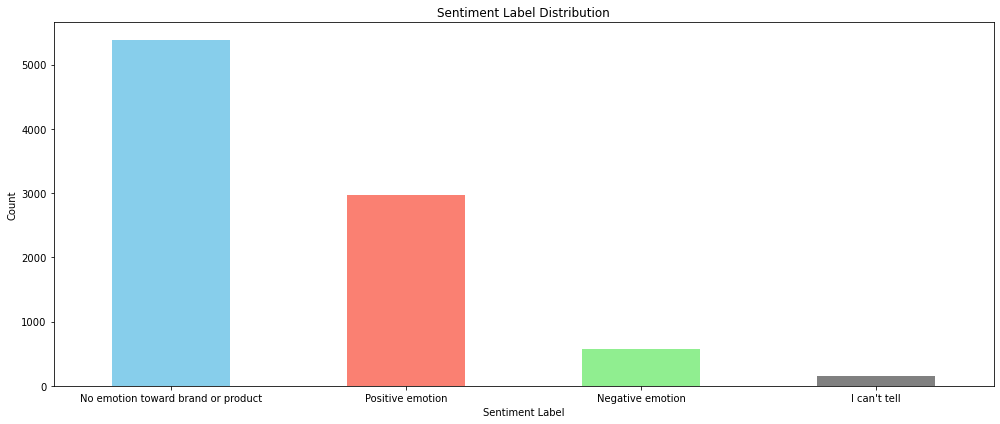

In [24]:
# Check the distribution of sentiment labels
plt.figure(figsize=(14, 6))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(
    kind='bar', 
    color=['skyblue', 'salmon', 'lightgreen', 'gray']
)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## ***2. DATA PREPROCESSING AND CLEANING***

steps in preprocessing:
- rename columns
- Drop rows with missing or undefined targets if needed
- Normalize tweet text: lowercase, strip links, mentions, punctuation
- Tokenize & lemmatize
- Remove stopwords for clarity


In [27]:
df = df.rename(columns={
    'tweet_text': 'text',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment',
    'emotion_in_tweet_is_directed_at': 'brand'
})
df = df[['text', 'sentiment', 'brand']]

In [28]:
df.head(5)

,text,sentiment,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,iPhone
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,iPad or iPhone App
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,iPad
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,iPad or iPhone App
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,Google


In [30]:
df['sentiment'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [31]:
class Animal:  # Base class
    def __init__(self, name):
        self.name = name

    def speak(self):
        return "Some sound"

class Dog(Animal):  # Inherited class
    def speak(self):
        return "Woof!"

class Cat(Animal):
    def speak(self):
        return "Meow"
class cow(Animal):
    def speak(self):
        return "Moo"

dog = Dog("Rex")
cat = Cat("Whiskers")
cow = cow("Bessie")

print(dog.name, dog.speak())  # Rex Woof!
print(cat.name, cat.speak())  # Whiskers Meow
print(cow.name, cow.speak())  # Bessie Moo


Rex Woof!
Whiskers Meow
Bessie Moo


In [32]:
class DataCleaner:
    def __init__(self, df):
      self.df = df.copy()

    def remove_duplicates(self):
        # remove duplicates
        self.df.drop_duplicates(inplace=True)
   
    def clean_text(self):
        # removve mentons , urls,hashtag symbol,punctuation and digits
        self.df['text'] = self.df['text'].str.replace(r'@\w+', '', regex=True)# Remove mentions
        self.df['text'] = self.df['text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)  # Remove URLs
        self.df['text'] = self.df['text'].str.replace(r'#\w+', '', regex=True) # Remove hashtags
       # self.df['text'] = self.df['text'].str.replace(r'\d+', '', regex=True) # Remove digits
        self.df['text'] = self.df['text'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation  
        #lowercase the text   
        self.df['text'] = self.df['text'].str.lower()  # Convert to lowercase
        # Remove leading and trailing whitespace
        self.df['text'] = self.df['text'].str.strip()  # Remove leading and trailing whitespace
        # Remove extra spaces
        self.df['text'] = self.df['text'].str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
        # Remove empty strings
        self.df = self.df[self.df['text'] != '']
        # Remove rows with empty text
        self.df = self.df[self.df['text'].notna()]

    def get_cleaned_data(self):
        return self.df  
cleaner = DataCleaner(df)
#cleaner.fill_missing_values()
cleaner.remove_duplicates()
#cleaner.lowercase_columns()
# new column cleaned_text
df['cleaned_text']=cleaner.clean_text()
cleaned_df = cleaner.get_cleaned_data()
print(cleaned_df.head())


                                                text         sentiment  \
0  i have a 3g iphone after 3 hrs tweeting at it ...  Negative emotion   
1  know about awesome ipadiphone app that youll l...  Positive emotion   
2  can not wait for 2 also they should sale them ...  Positive emotion   
3  i hope this years festival isnt as crashy as t...  Negative emotion   
4  great stuff on fri marissa mayer google tim or...  Positive emotion   

                brand  
0              iPhone  
1  iPad or iPhone App  
2                iPad  
3  iPad or iPhone App  
4              Google  


In [33]:
#checking missing values
cleaned_df.isnull().sum()

text            0
sentiment       0
brand        5786
dtype: int64

In [38]:
#drop brand column
cleaned_df = cleaned_df.drop(columns=['brand'])

In [ ]:
cleaned_df.shape

(9068, 2)

In [40]:
class BrandCategorizer:
    def __init__(self, df):
        self.df = df.copy()
    def categorize_brand(self, text):
        if pd.isna( text):
            return 'Unknown'
         #text =  text.lower()
        if any(x in  text for x in ['apple', 'iphone', 'ipad', 'macbook']):
            return 'Apple'
        elif any(x in  text for x in ['google', 'android', 'pixel', 'chromebook']):
            return 'Google'
        else:
            return 'Other'
    def apply_categorization(self):
        self.df['brand_category'] = self.df['text'].apply(self.categorize_brand)
        return self.df
categorizer = BrandCategorizer(cleaned_df)
cleaned_df = categorizer.apply_categorization()
cleaned_df['brand_category'].value_counts()


Apple     4850
Google    2437
Other     1781
Name: brand_category, dtype: int64

In [42]:
# tokenization
nltk.download('punkt')
cleaned_df['tokenized_text'] = cleaned_df['text'].apply(word_tokenize)
# Check the first few rows after tokenization
cleaned_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,sentiment,brand_category,tokenized_text
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,Apple,"[i, have, a, 3g, iphone, after, 3, hrs, tweeti..."
1,know about awesome ipadiphone app that youll l...,Positive emotion,Apple,"[know, about, awesome, ipadiphone, app, that, ..."
2,can not wait for 2 also they should sale them ...,Positive emotion,Other,"[can, not, wait, for, 2, also, they, should, s..."
3,i hope this years festival isnt as crashy as t...,Negative emotion,Apple,"[i, hope, this, years, festival, isnt, as, cra..."
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, on, fri, marissa, mayer, google..."


In [43]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
cleaned_df['tokenized_text'] = cleaned_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stopwords])
# Check the first few rows after stopwords removal
cleaned_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,brand_category,tokenized_text
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,Apple,"[3g, iphone, 3, hrs, tweeting, dead, need, upg..."
1,know about awesome ipadiphone app that youll l...,Positive emotion,Apple,"[know, awesome, ipadiphone, app, youll, likely..."
2,can not wait for 2 also they should sale them ...,Positive emotion,Other,"[wait, 2, also, sale]"
3,i hope this years festival isnt as crashy as t...,Negative emotion,Apple,"[hope, years, festival, isnt, crashy, years, i..."
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti..."


In [44]:
#lammatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
cleaned_df['lemmatized_text'] = cleaned_df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# Check the first few rows after lemmatization
cleaned_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...


,text,sentiment,brand_category,tokenized_text,lemmatized_text
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,Apple,"[3g, iphone, 3, hrs, tweeting, dead, need, upg...","[3g, iphone, 3, hr, tweeting, dead, need, upgr..."
1,know about awesome ipadiphone app that youll l...,Positive emotion,Apple,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,can not wait for 2 also they should sale them ...,Positive emotion,Other,"[wait, 2, also, sale]","[wait, 2, also, sale]"
3,i hope this years festival isnt as crashy as t...,Negative emotion,Apple,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


In [45]:
#count tweet by sentiment class
sentiment_counts = cleaned_df['sentiment'].value_counts()
print(sentiment_counts)

No emotion toward brand or product    5373
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64


In [46]:
# •	Tweet length distribution
cleaned_df['tweet_length']=cleaned_df['text'].apply(lambda x: len(x.split()))
# Check the first few rows after tweet length calculation
cleaned_df.head()

,text,sentiment,brand_category,tokenized_text,lemmatized_text,tweet_length
0,i have a 3g iphone after 3 hrs tweeting at it ...,Negative emotion,Apple,"[3g, iphone, 3, hrs, tweeting, dead, need, upg...","[3g, iphone, 3, hr, tweeting, dead, need, upgr...",20
1,know about awesome ipadiphone app that youll l...,Positive emotion,Apple,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely...",18
2,can not wait for 2 also they should sale them ...,Positive emotion,Other,"[wait, 2, also, sale]","[wait, 2, also, sale]",12
3,i hope this years festival isnt as crashy as t...,Negative emotion,Apple,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph...",13
4,great stuff on fri marissa mayer google tim or...,Positive emotion,Google,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti...",15
